# Prospect Loan Data Visualization
## by Philip Karns

## Preliminary Wrangling

This document explores a dataset from the Prosper loan company, which includes finding trends among variables that include Interest Rate, Loan Amount, and loan status. The dataset contains data for 113,937 loans across 81 variables for each loan.   

In [494]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [495]:
#load the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

In [496]:
#look at the first few rows to get an idea of the data we're working with.
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [497]:
#review data shape
loans.shape

(113937, 81)

In [498]:
#review data types
loan_df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

### What is the structure of your dataset?

There are 113,937 rows and 81 categories. Most variables are numeric.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in determining what variables are best for predicting loan interest rate, and what factors are best for predicting loan default. 

Term
LoanStatus (default info. change to categorical?)
BorrowerRate
ProsperRating
ProsperScore
ListingCategory (reason for taking out loan)
Borrower State
Employment Status (change to categorical?)
IsBorrowerHomeowner
CreditScoreRangeUpper/Lower
FirstRecordedCreditLine
OpenRevolvingMonthlyPayment
TotalInquiries
CurrentDelinquencies
BankcardUtilization (percentage of available revolving credit utilized at time profile was pulled)
IncomeRange

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect ProsperRating(Prosper's level of risk rating), borrower credit score, and BankcardUtilization (percentage of available credit being utilized) will have the biggest effect on the interest rate of the loans, and for predicting loan default.

questions to ask:
- What factors affect the borrower rate?
- which states have the highest interest rates?
- which states have the riskiest loans?
- What factors affect loan default?
- is there a correlation between credit score and prosper's risk score?
- How does the percentage of revolving credit affect credit score? (bivariate plot)

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

I'll start by looking at the distribution of the main variable of interest: BorrowerRate

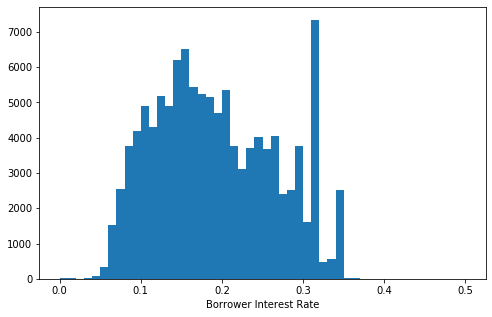

In [499]:
binsize = 0.01
bins = np.arange(0, loans.BorrowerRate.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'BorrowerRate', bins = bins)
plt.xlabel('Borrower Interest Rate');

Borrower Interest Rate is a bimodal distribution, with the first spike at about 15 percent, and the largest spike at about 32%. The majority of the interest rates fall between 10% and 20%. Before and after the largest spike at 32% there's a steep jump and then a steep dropoff, rather than smooth ramping up or down.

Next up, the first predictor variable of interest: ProsperScore

In [500]:
loans.ProsperScore

0         NaN
1         7.0
2         NaN
3         9.0
4         4.0
         ... 
113932    5.0
113933    8.0
113934    3.0
113935    5.0
113936    7.0
Name: ProsperScore, Length: 113937, dtype: float64

C:\Users\pkarns\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


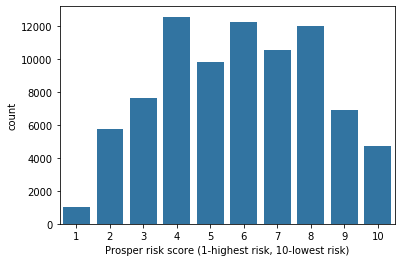

In [501]:
# binsize = 1
# bins = np.arange(0, loans.ProsperScore.max()+binsize, binsize)

# plt.figure(figsize=[8, 5])
# plt.hist(data = loans, x = 'ProsperScore', bins = bins)
# plt.xlabel('Prosper risk score (1-highest risk, 10-lowest risk');


# plotting Credit Score on a standard scale

#convert data type to ordinal categorical because these are ranked values, not float values
#also 
level_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
loan_score_not_null = loans['ProsperScore'] > 0
loans_sub = loans.loc[loan_score_not_null,:]
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
loans_sub['ProsperScore'] = loans_sub['ProsperScore'].astype(ordered_cat)

#plot the data and make all one color
base_color = sb.color_palette()[0]
sb.countplot(data = loans_sub, x = 'ProsperScore', color = base_color);
plt.xlabel('Prosper risk score (1-highest risk, 10-lowest risk)');

The result is a normal distribution, which is expected because the level of risk for each new loan is relative to the risk of other loans. Because of this, the majority of risk scores are in the middle, with fewer risk scores at the extreme ends of the scale. The most common risk score is a 4 which is relatively high risk, followed by 6 and 8, which are less risky scores.

Now we'll look at the distribution for the next predictor variable: Credit Score (CreditScoreRangeUpper)

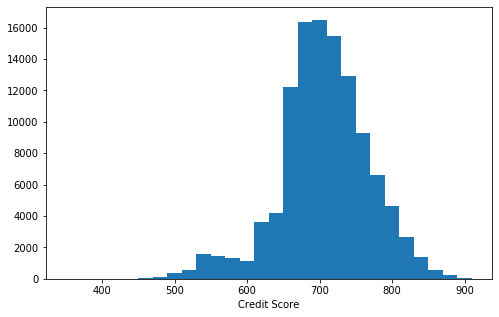

In [502]:
# plotting Credit Score on a standard scale
binsize = 20
bins = np.arange(350, loans['CreditScoreRangeUpper'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'CreditScoreRangeUpper', bins = bins)
plt.xlabel('Credit Score');

We end up with another normally distributed plot, and may correlate with the Prosper Risk Score we evaluated earlier, as the majority of the values fall in the middle of the range, with a peak around 700. We'll look into that possible correlation later. The credit score range differs by various scoring agencies, but is typically within a range of 350-850. Some scoring agencies go as high as 900, which may be why we see some values above 850 here. 

Next let's look at the BankcardUtilization variable, which is the percentage of available revolving credit utilized at time client's profile was pulled for the loan.

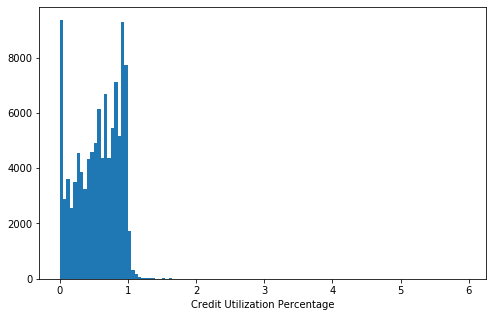

In [503]:
# plotting Credit utilization on a standard scale
binsize = .05
bins = np.arange(0, loans['BankcardUtilization'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'BankcardUtilization', bins = bins)
plt.xlabel('Credit Utilization Percentage');

The initial plot of the Credit Utilization Percentages shows that we appear to have some outliers to the far right of most of our data. It's worth looking into these values to see if they make sense.

In [504]:
#select high outliers for Credit Utilization and compare to their credit scores
high_outliers = loans['BankcardUtilization'] > 2
high_outliers_df = loans.loc[high_outliers,:]
print(high_outliers_df[['CreditScoreRangeUpper', 'BankcardUtilization']])

        CreditScoreRangeUpper  BankcardUtilization
5031                    539.0                 4.73
26151                   699.0                 5.95
32777                   579.0                 2.66
32845                   579.0                 2.36
37107                   579.0                 2.35
53951                   559.0                 2.05
67184                   579.0                 3.47
70752                   559.0                 2.68
71777                   579.0                 5.83
75144                   599.0                 2.46
78628                   679.0                 2.25
86204                   659.0                 2.04
89611                   599.0                 2.27
94925                   619.0                 2.07
100683                  619.0                 2.50
102530                  719.0                 2.23
105762                  579.0                 2.21


We have 17 loans that were provided to clients with a Credit Utilization at the time of the loan above 200% of their available credit. Again, credit scores vary amongst different scoring agencies, but, according to FICO, a 'Very Poor' credit score is considered anything between 300-579, and between 580-669 is considered 'Fair'. 

With such a high utilization of revolving credit, I'd expect to see nearly all of these in the 'Very Poor' range. Many of them are, and some are at the lower end of the 'Fair' range, but many don't appear to make sense, including the credit score of the highest utilized credit of 5.95, which has a corresponding credit score of 699, considered good credit according to FICO.

Because we have some inconsistency with these outliers, for now we'll evaluate the data below the 200% threshold to get a better sense of how the majority of the data is distributed.

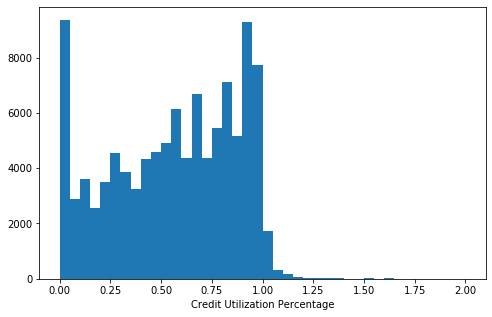

In [505]:
# plotting Credit utilization below 200%
credit_utilization_under2 = loans['BankcardUtilization'] < 2
loans_sub_utilization = loans.loc[credit_utilization_under2,:]

binsize = .05
bins = np.arange(0, loans_sub_utilization['BankcardUtilization'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'BankcardUtilization', bins = bins)
plt.xlabel('Credit Utilization Percentage');

Credit utilization is a multi-modal distribution, with the highest peaks being around zero and .9. More than half of borrowers appear to be utilizing between half and all of their credit, which isn't looked at favorable because a smaller utilization is better for, so it will be interesting to see how this variable affects interest rates. We'll also see whether utilization has an affect on credit scores.

The next thing we'll look at is how many borrowers are home owners, and later we'll see whether this has an affect on interest rates and other variables.

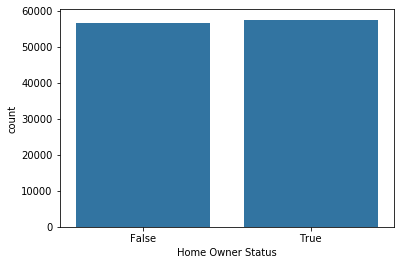

In [506]:
#plotting home ownership status 
base_color = sb.color_palette()[0]
sb.countplot(data = loans, x = 'IsBorrowerHomeowner', color = base_color);
plt.xlabel('Home Owner Status');

Just over half of the borrowers are home owners. Generally speaking, home owners are considered to be more responsible and less risky, so we'll see if that shows in the interest rates and compared to other variables.

The next variable for review is borrower state.

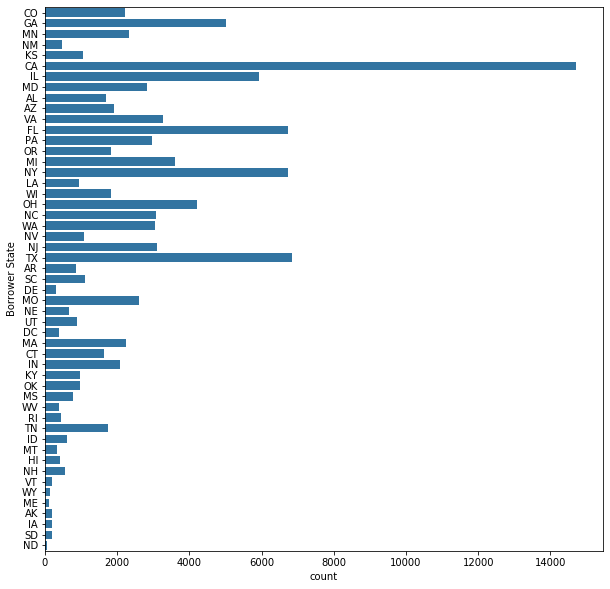

In [507]:
# plotting borrower state
plt.figure(figsize=[10, 10])
base_color = sb.color_palette()[0]
sb.countplot(data = loans, y = 'BorrowerState', color = base_color);
plt.ylabel('Borrower State');

California borrowers have taken out twice as many loans as borrowers from any other state, followed by Florida, New York, and Texas. Later we'll review what these loans are being taken out for to get some insights into why this might be.

Now, let's look at the reasons borrowers are taking out these loans.

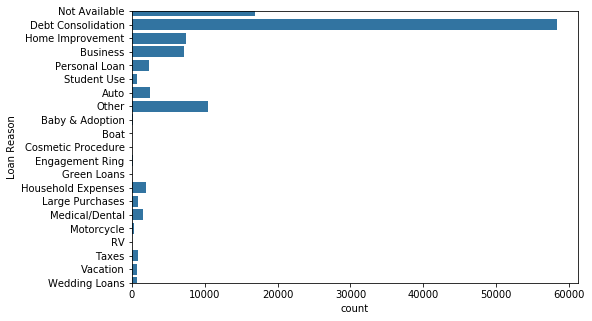

In [508]:
#plotting loan reasons
level_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].astype(ordered_cat)

# type_list = ['Wedding Loans', 'Vacation', 'Taxes', 'RV', 'Motorcycle', 'Medical/Dental', 'Large Purchases', 'Household Expenses',
#          'Green Loans', 'Engagement Ring', 'Cosmetic Procedure', 'Boat', 'Baby & Adoption', 'Other', 'Auto', 'Student Use',
#          'Personal Loan', 'Business', 'Home Improvement', 'Debt Consolidation', 'Not Available']

type_list = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 
'Baby & Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases',
 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans']


plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
ax = sb.countplot(data = loans, y = 'ListingCategory (numeric)', color = base_color);

type_list_array = np.array(type_list)
level_order_array = np.array(level_order)

ax.set_yticks(level_order)
ax.set_yticklabels(type_list);
#plt.yticks(tick_labels)

plt.ylabel('Loan Reason');

The overwhelming majority of people are taking out loans for Debt consolidation, with about 5 times as many loans as the 'Other' category, and about 7 times as many loans as Home Improvement or Business. This is a troublesome finding, as it gives some insight into the personal debt many people in the United States are dealing with. Instead of taking out loans for additional purchases, most people are taking out loans to get all of their existing debt into one payment. 

Finally we'll look at Employment Status.

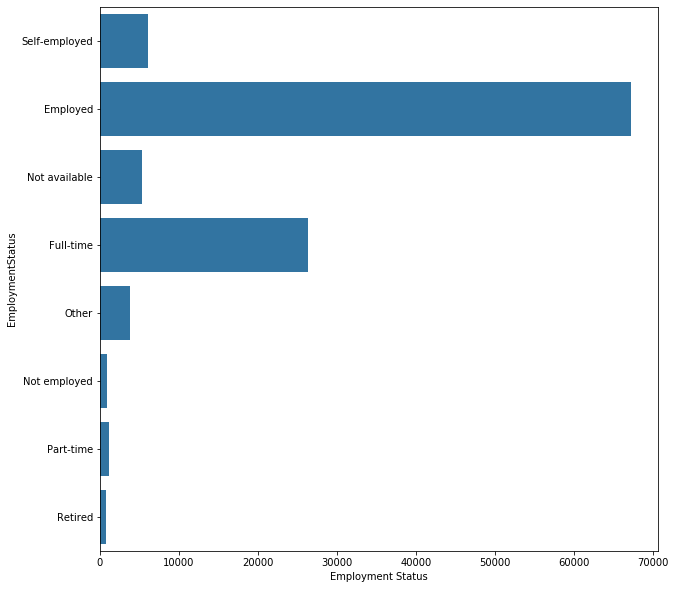

In [509]:
# plotting employment status state
plt.figure(figsize=[10, 10])
base_color = sb.color_palette()[0]
sb.countplot(data = loans, y = 'EmploymentStatus', color = base_color);
plt.xlabel('Employment Status');

The majority of borrowers are employed, but less than half are employed full time. I'd expect full-time workers to have better interest rates, so we'll see if that's the case.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Borrower interest rate was mostly between 10 and 20%, though there was a large spike at around 32%, so it will be interesting to see what factors cause that spike. 

California had the most borrowers by far, and it's known as one of the most expensive states to live in, so we'll look to get more insight into the loans those residents are taking out.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating Credit utilization there were some outliers that didn't make sense, so those points weren't included in the final plot so the majority of the data could be reviewed. 

## Bivariate Exploration

# 2 qualitative - clustered bar charts
# 1 quan 1 qual - violin
# 2 quan - scatter

To begin I want to look at the correlations between features we're evaluating

In [510]:
numeric_vars = ['BorrowerRate', 'CreditScoreRangeUpper', 'BankcardUtilization']
categoric_vars = ['ProsperScore', 'IsBorrowerHomeowner', 'ListingCategory (numeric)', 'EmploymentStatus']

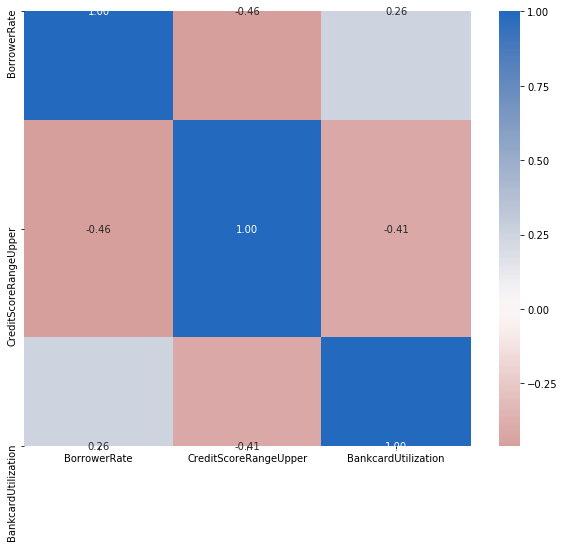

In [511]:
#correlation plot
plt.figure(figsize=[10, 8])
sb.heatmap(loans[numeric_vars].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

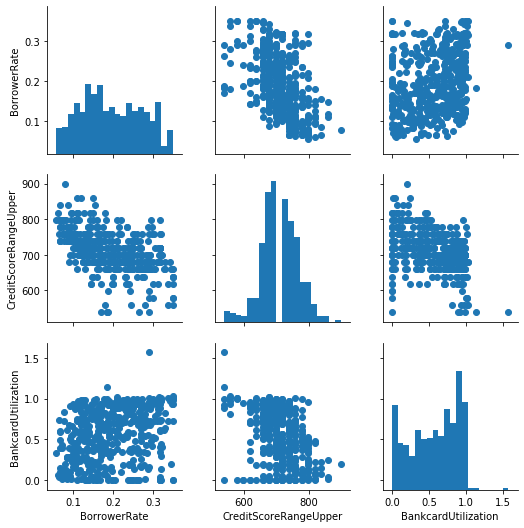

In [512]:
# plot matrix: sample 500 diamonds
samples = np.random.choice(loans_sub_utilization.shape[0], 500, replace = False)
loans_samp = loans_sub_utilization.loc[samples,:]

g = sb.PairGrid(data = loans_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

There isn't much correlation between borrower interest rate and bank card utilization, which is a bit surprising because ulilizing too much of your available credit is generally looked at negatively. 

As expected, there is a negative correlation between borrower interest rate and Credit score, where borrowers with higher credit scores typically have lower interest rates, and vice versa.

There is a slight negative correlation between credit score and card utilization also, which makes sense because credit scores typically go up and down slightly as credit is used or paid down.

Now we'll look at how the interest rate correlates with our categorical variables.

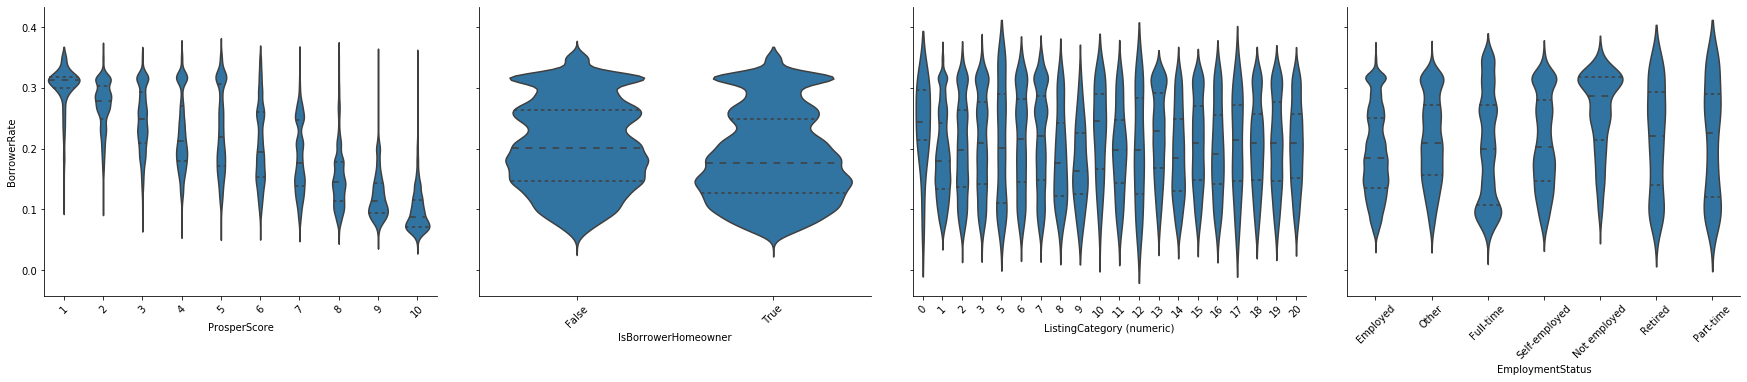

In [513]:
#plt.figure(figsize=[8, 5])
g = sb.PairGrid(data = loans_sub, x_vars = categoric_vars, y_vars = 'BorrowerRate', height = 4)
g.map(sb.violinplot, inner = 'quartile');
g.fig.set_size_inches(25,5)

g.fig.draw(
    g.fig.canvas.get_renderer()
)
for ax in g.axes.flat: 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

As expected with Prosper Score, it has a direct negative correlation with borrower interest rate. As mentioned above, a lower Prosper score means higher risk, and a higher score means lower risk. We can see in the width of the violin plots that the higher borrower rates are associated with higher risk, and the lower rates are associated with less risk.

We also see some correlation between interest rate and whether or not the borrowers are home owners. Homeowners are more likely to have lower interest rates than non-homeowners. 

Being employed and working full time also result in lower borrower interest rates, while borrowers who aren't employed clearly have higher interest rates than any other group. This is expected, as there's a degree of certainty for full-time workers.

Because the ListingCategory variable doesn't list the titles for each numerical value, we'll discuss that plot below with our labels.

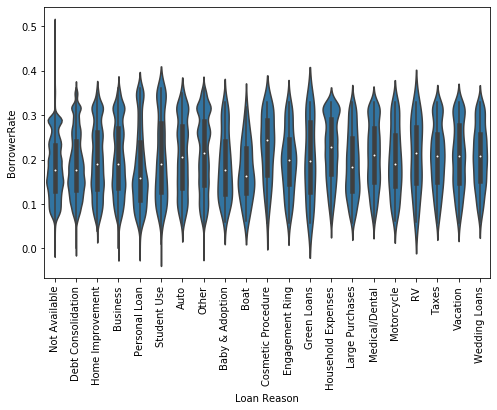

In [514]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
ax = sb.violinplot(data = loans, y = 'BorrowerRate', x = 'ListingCategory (numeric)', color = base_color, height = 20);

type_list_array = np.array(type_list)
level_order_array = np.array(level_order)

ax.set_xticks(level_order)
ax.set_xticklabels(type_list);
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.xlabel('Loan Reason');

For Listing Category, which is the reason for the loan, we do see some trends. Loans for household expenses are have a higher proportion of higher interest rates than other categories, while loans for boats, baby & adoption, Personal Loans, and Debt Consolidation are on the lower scale.

Next let's also look at Borrower State, which I separated because the large number of states would be difficult to see on a smaller plot.

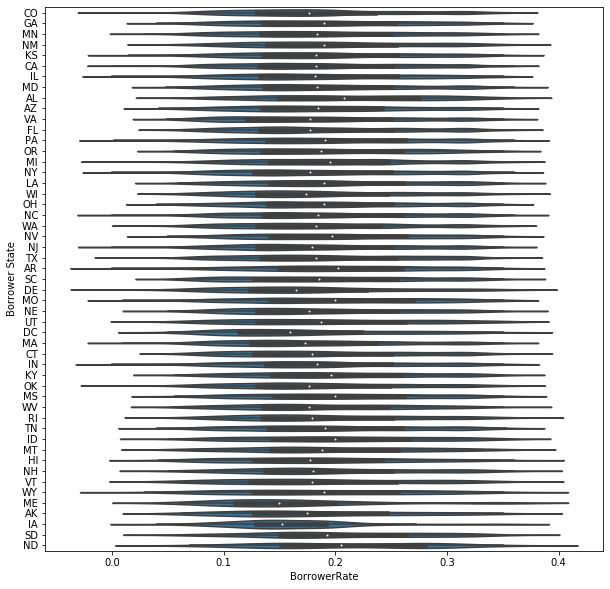

In [515]:
#BorrowerState
plt.figure(figsize=[10, 10])
base_color = sb.color_palette()[0]
sb.violinplot(data = loans, x = 'BorrowerRate', y = 'BorrowerState', color = base_color);
plt.ylabel('Borrower State');

There are some interesting differences among states. Maine and Iowa have the lowest average interest rates, and also a higher proportion of low interest rates. For higher interest rates Alabama and Arkansas top the list on average. We'll look to find reasons for this later. 

Now let's look at some correlations amongst some of the categorical variables, starting with Prosper Score.

In [516]:
#categoric_vars = ['ProsperScore', 'IsBorrowerHomeowner', 'ListingCategory (numeric)', 'EmploymentStatus']
#borrower state

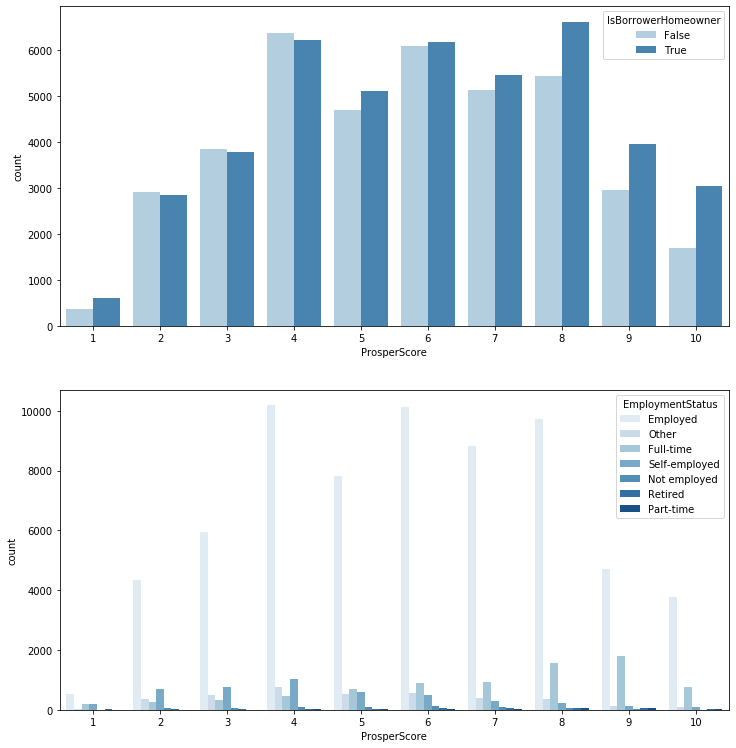

In [517]:
plt.figure(figsize=[12, 20])
# subplot prosper score vs homeowner status
plt.subplot(3, 1, 1)
sb.countplot(data = loans_sub, hue = 'IsBorrowerHomeowner', x = 'ProsperScore', palette = 'Blues');

# subplot prosper score vs employment status
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loans_sub, hue = 'EmploymentStatus', x = 'ProsperScore', palette = 'Blues');

# # subplot prosper score vs employment status
# #test = loans_sub['ListingCategory (numeric)'] != 1
# #no_debt_consol = loans_sub.loc[test,:]
# ax2 = plt.subplot(3, 1, 3)
# sb.countplot(data = loans_sub, x = 'ListingCategory (numeric)', hue = 'ProsperScore', palette = 'Blues')

# #plt.yscale('log')
# #plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])

# ax2.set_xticks(level_order)
# ax2.set_xticklabels(type_list);
# plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)

# plt.xlabel('Loan Reason');

Here we looked at prosper score vs two categorical variables: home ownership and employment status. 

For home ownership, on the riskier end of the scale we can see that non-home owners are typically riskier than home owners, while on the high end of the scale with less risk there are clearly more home owners than non-home owners.

While employed borrowers overall are distributed normally, full-time employees are less risky than self-employed or unemployed borrowers.

One other categorical interation I want to review is the state of California and the type of loans the borrowers are taking out. As we saw earlier, California had the majority of loans in our dataset, so it's important to find out what kind of loans they are taking out.

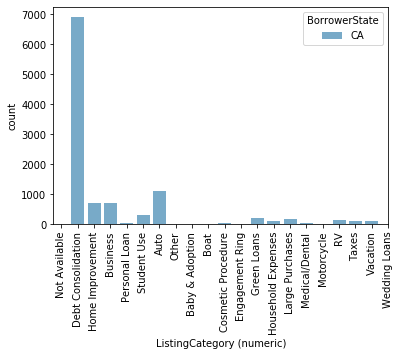

In [528]:
california = loans_sub.query('BorrowerState == "CA"')

ax3 = sb.countplot(data = california, x = 'ListingCategory (numeric)', hue = 'BorrowerState', palette = 'Blues')

ax3.set_xticks(level_order)
ax3.set_xticklabels(type_list);
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=90);

As surmised earlier, Debt Consolidation is far and away the largest loan type for the state of California. Because of California's high cost of living, it appears that is, at least in part, resulting in a lot of debt for the residents of the state.

Now let's look further into the Borrower Interest Rate vs Credit Score relationship further. 

Text(0, 0.5, 'Credit Score')

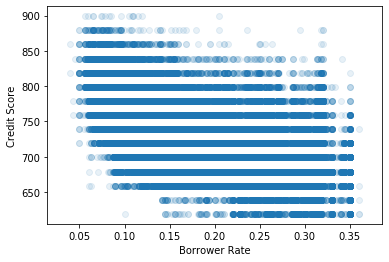

In [527]:
# scatter plot of Prosper Score vs Credit Score

#plt.figure(figsize = [8, 6])
plt.scatter(data = loans_sub, x = 'BorrowerRate', y = 'CreditScoreRangeUpper', alpha = 1/10)
#plt.xlim([0, 3.5])
plt.xlabel('Borrower Rate')
#plt.yscale('log')
#plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Credit Score');
#sb.regplot(data = loans_sub, x = 'BorrowerRate', y = 'CreditScoreRangeUpper', x_jitter = 0.3, scatter_kws = {'alpha' : 1/20});


Having a credit score below 650 almost guarantees that the borrower interest rate will be at least in the 14% range, and even more likely to be above 20%. Most of our values are saturated in the middle, showing that credit scores between 700 and 800 can see any range of interest rate, meaning these borrowers generally have good to great credit, and there are other factors considered that cause borrower rate to fluctuate between 5% and 30%.

Now let's take a closer look at the Borrower Rate and Credit Utilization to see if any other trends appear.

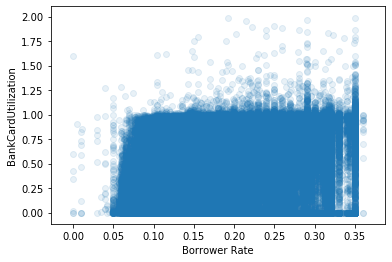

In [533]:
plt.scatter(data = loans_sub_utilization, x = 'BorrowerRate', y = 'BankcardUtilization', alpha = 1/10)
#plt.xlim([0, 3.5])
plt.xlabel('Borrower Rate')
#plt.yscale('log')
#plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('BankCardUtilization');

What this tells us is that if your credit utilization is anywhere between 0 and 100%, your interest rate could be between 05 and 35%. So not a strong correlation here, though we do see outliers where if credit utilization is above 100%, borrowers are more likely to have interest rates in the higher ranges.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Credit Utilization had a surprisingly low effect on borrower interest rate. Clearly this loan company is more interested in other variables to determine their interest rates and doesn't consider high credit utilization to be very risky.

Home ownership is a significant factor in determining risk, as home owners outpaced non-home owners with the least-risky Prosper risk scores.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The state of California had an extremely high proportion of Debt Consolidation loans. That is concerning for a state with a high cost of living.

There wasn't much correlation between Credit Score and Credit Utiliation. Even those borrowers with high utilization could still have credit scores on the high end. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!